In [528]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [529]:
start_date = '2017-01-01'
end_date = '2024-03-31'
usd_yuan_ticker = 'USDCNY=X' # czy cnyusd?
oil_ticker = 'CL=F'
all_data = yf.download(tickers=[usd_yuan_ticker, oil_ticker], start=start_date, end=end_date)["Close"]
all_data = all_data.rename(columns={oil_ticker: "oil", usd_yuan_ticker: "currency"})

[*********************100%%**********************]  2 of 2 completed


In [530]:
all_data = all_data.pct_change(fill_method=None)

In [531]:
all_data['month'] = pd.PeriodIndex(all_data.index, freq='M')

monthly = all_data.groupby(by = 'month').max()

In [532]:
fit_m = monthly[:'2023-01']

## Waluty

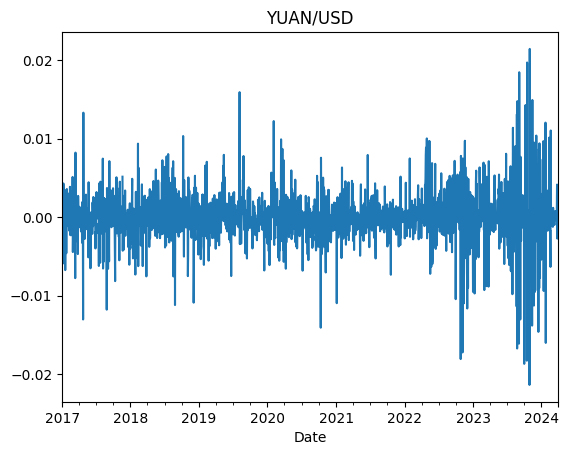

In [533]:
_ = all_data.currency.plot(title='USD/YUAN')

In [534]:
c, loc, scale = stats.genextreme.fit(fit_m["currency"])
print(f'c={c}, loc={loc}, scale={scale}')

c=-0.8254288263122577, loc=0.003810623827382461, scale=0.002130328128893931


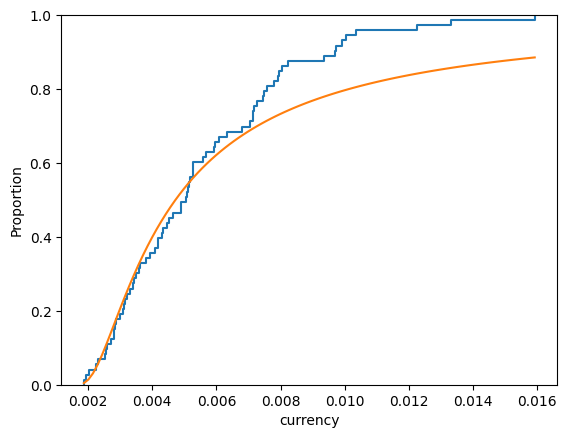

In [535]:
sns.ecdfplot(fit_m.currency)
t = np.linspace(min(fit_m.currency), max(fit_m.currency), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))

### Backtesting

In [536]:
print(f'Dobrane parametry: c={c}, loc={loc}, scale={scale}')

Dobrane parametry: c=-0.8254288263122577, loc=0.003810623827382461, scale=0.002130328128893931


In [537]:
print(f"średnia={np.mean(monthly['2023-02':]['currency'])},\n"
      f"odchylenie standardowe = {np.std(monthly['2023-02':]['currency'])}")

średnia=0.0104737173930916,
odchylenie standardowe = 0.00508555616914531


## Ropa

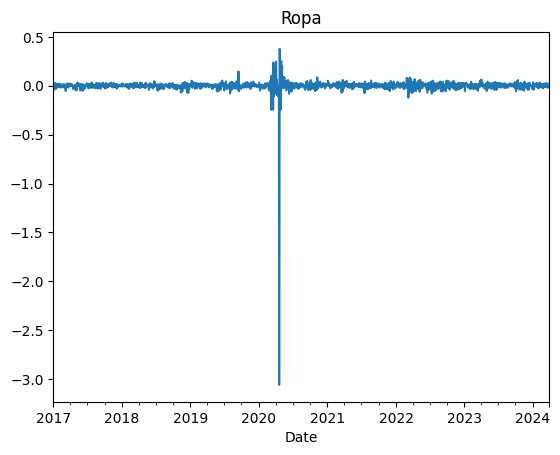

In [538]:
_ = all_data.oil.plot(title='Ropa')

In [539]:
c, loc, scale = stats.genextreme.fit(fit_m.oil)
print(f'c={c}, loc={loc}, scale={scale}')

c=-0.4101194292589708, loc=0.029984698345009397, scale=0.012651795220921363


In [540]:
print(f"średnia={np.mean(monthly['2023-02':].oil)},\n"
      f"odchylenie standardowe = {np.std(monthly['2023-02':].oil)}")

średnia=0.03876391341106665,
odchylenie standardowe = 0.01089754434547919


### Wartości odstające

In [541]:
q1 = fit_m.oil.quantile(0.25)
q3 = fit_m.oil.quantile(0.75)
iqr = q3 - q1
all_data.loc[(all_data.oil <= q1 - 1.5 * iqr) | (all_data.oil >= q3 + 1.5 * iqr), "oil"] = np.median(all_data[:'2023-01'].oil)

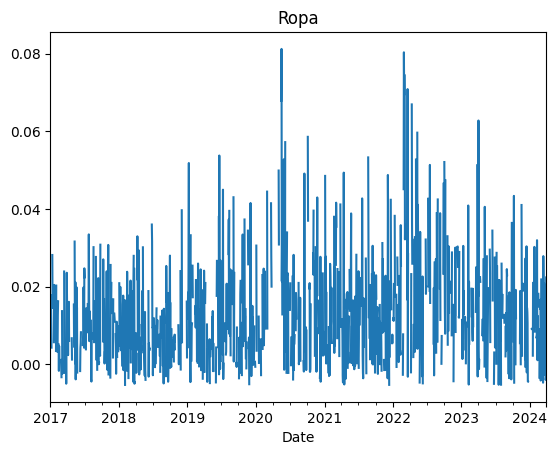

In [542]:
_ = all_data.oil.plot(title="Ropa")

In [543]:
monthly = all_data.groupby(by='month').max()
fit_m = monthly[:'2023-01']

In [544]:
c, loc, scale = stats.genextreme.fit(fit_m.oil)
print(f'c={c}, loc={loc}, scale={scale}')

c=-0.016248213965368484, loc=0.030902868151204854, scale=0.011114244558845032


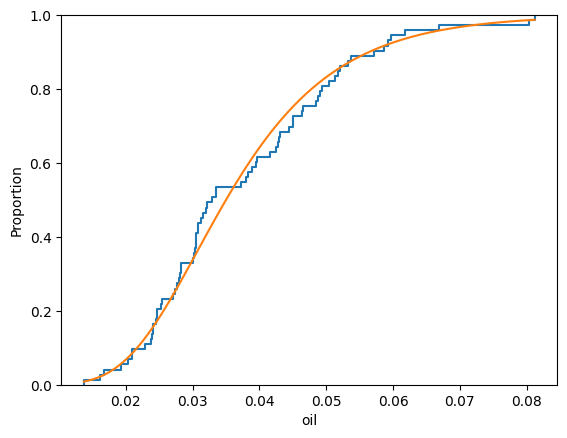

In [545]:
sns.ecdfplot(fit_m.oil)
t = np.linspace(min(fit_m.oil), max(fit_m.oil), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))

### Backtesting

In [546]:
print(f'Dobrane paraemetry: c={c}, loc={loc}, scale={scale}')

Dobrane paraemetry: c=-0.016248213965368484, loc=0.030902868151204854, scale=0.011114244558845032


In [547]:
print(f"średnia={np.mean(monthly['2023-02':].oil)},\n"
      f"odchylenie standardowe = {np.std(monthly['2023-02':].oil)}")

średnia=0.03876391341106665,
odchylenie standardowe = 0.01089754434547919
